# Analysis/Prediction if the patient is out of risk


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import OneHotEncoder

In [2]:
dataset=pd.read_csv('././data/surgery.csv')
dataset

,Name,Age,Sex,Blood Pressure,Hb/Hct,WBC/plateletes,Sugar F/PP/R,Urea/Creatinine,NA/K/CA,T Proteins /A/G,Biliburin/D/l,SGOT/PT,ALKP04ASE,HBsAG/HIV
0,Gaurav Chawla,51.0,Male,128/61,11.5/356,13200/321,NaN,17/0.5,139/3.3/1.3,NaN,0.3,NaN,NaN,NaN
1,Manohar Bhoota,42.0,Male,120/66,10.2/321,19990/310,NaN,19/0.9,143/4/8.5,6.8/3.7,0.39/0.21/0.1,45/158,124.0,NaN
2,Pinki,40.0,Female,119/72,11.9,6.920/274,92,23/0.5,140,6.8/4.3/1.66,0.6/0.1/0.4,20/23,48.0,NaN
3,Kesh Raj,13.0,Male,NaN,13.2/39.1,5.9/219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Payal,17.0,Female,119/90,14/43,5800/1.81,NaN,21/0.69,141,7.5/4.9,1.66/0.61/1.05,24/21,64.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Nasreen,56.0,Female,155/90,12.1,7.83/154,101,29/0.7,110,7.5/4.8/2.7,0.5,36/51,248.0,NaN
91,Sony,39.0,Female,120/89,NaN,4.82/80,NaN,18/0.39,139/3.57/8.8,7.5/4.2,0.92/0.32,011/026,79.0,NaN
92,Anupam Batra,61.0,Female,130/90,11.9,4490/1.74,139,12/0.57,142/4.47,5.58/3.64,0.64,29/31,69.0,NaN
93,Amarjeet,29.0,Male,108/72,8.1/26,9250/2.97,115,19.3/0.56,135/4.9/8.8,6.07/3.3,0.95/0.34/0.57,18/20,NaN,NaN


# $\color{red}{\text{Data Pre-processing}}$

### datatype for all the column vlaues

In [3]:
dataset.dtypes

Name                object
Age                float64
Sex                 object
Blood Pressure      object
Hb/Hct              object
WBC/plateletes      object
Sugar F/PP/R        object
Urea/Creatinine     object
NA/K/CA             object
T Proteins /A/G     object
Biliburin/D/l       object
SGOT/PT             object
ALKP04ASE          float64
HBsAG/HIV          float64
dtype: object

* one of the first thing we need to do is handle the mising values

In [4]:
dataset.isnull().sum()

Name                0
Age                 4
Sex                 0
Blood Pressure     13
Hb/Hct              4
WBC/plateletes      4
Sugar F/PP/R       34
Urea/Creatinine     4
NA/K/CA             7
T Proteins /A/G    14
Biliburin/D/l       3
SGOT/PT            10
ALKP04ASE          14
HBsAG/HIV          95
dtype: int64

In [5]:
# dropping 'HBsAG/HIV' cloumn    reason no data was avaliable(empty)
dataset=dataset.drop(['HBsAG/HIV'], axis=1)

* single column has multiple values hence we can split this data into multiple columns

In [6]:
bloodPressure=dataset['Blood Pressure']
bloodPressure2=bloodPressure.str.split('/',n=1,expand=True)
dataset['Systolic Pressure']=np.double(bloodPressure2[0])
dataset['Diastolic Pressure']=np.double(bloodPressure2[1])

HbHct=dataset['Hb/Hct']
HbHct2=HbHct.str.split('/',n=1,expand=True)
dataset['Hb-Hemoglobin']=np.double(HbHct2[0])
dataset['Hct-Hematocrit']=np.double(HbHct2[1])

WBCplateletes=dataset['WBC/plateletes']
WBCplateletes2=WBCplateletes.str.split('/',n=1,expand=True)
dataset['WBC']=np.double(WBCplateletes2[0])
dataset['Plateletes']=np.double(WBCplateletes2[1])

Sugar=dataset['Sugar F/PP/R']
Sugar2=Sugar.str.split('/',n=1,expand=True)
dataset['F-fasting']=np.double(Sugar2[0])
dataset['PP-postprandial']=np.double(Sugar2[1])

UreaCreatinine=dataset['Urea/Creatinine']
UreaCreatinine2=UreaCreatinine.str.split('/',n=2,expand=True)
dataset['Urea']=np.double(UreaCreatinine2[0])
dataset['Creatinine']=np.double(UreaCreatinine2[1])

NAKCA=dataset['NA/K/CA']
NAKCA2=NAKCA.str.split('/',n=2,expand=True)
dataset['Na-Sodium']=np.double(NAKCA2[0])
dataset['K-Potassium']=np.double(NAKCA2[1])
dataset['Ca-Calcium']=np.double(NAKCA2[2])

Proteins=dataset['T Proteins /A/G']
Proteins2=Proteins.str.split('/',n=2,expand=True)
dataset['Total Proteins']=np.double(Proteins2[0])
dataset['A-Albumin']=np.double(Proteins2[1])
dataset['G-Globulins']=np.double(Proteins2[2])

Biliburin=dataset['Biliburin/D/l']
Biliburin2=Biliburin.str.split('/',n=2,expand=True)
dataset['Total Biliburin']=np.double(Biliburin2[0])
dataset['Direct Biliburin']=np.double(Biliburin2[1])
dataset['Indirect Biliburin']=np.double(Biliburin2[2])

SGOTPT=dataset['SGOT/PT']
SGOTPT2=SGOTPT.str.split('/',n=1,expand=True)
dataset['SGOT']=np.double(SGOTPT2[0])
dataset['SGPT']=np.double(SGOTPT2[1])

dataset

,Name,Age,Sex,Blood Pressure,Hb/Hct,WBC/plateletes,Sugar F/PP/R,Urea/Creatinine,NA/K/CA,T Proteins /A/G,...,K-Potassium,Ca-Calcium,Total Proteins,A-Albumin,G-Globulins,Total Biliburin,Direct Biliburin,Indirect Biliburin,SGOT,SGPT
0,Gaurav Chawla,51.0,Male,128/61,11.5/356,13200/321,NaN,17/0.5,139/3.3/1.3,NaN,...,3.30,1.3,NaN,NaN,NaN,0.30,NaN,NaN,NaN,NaN
1,Manohar Bhoota,42.0,Male,120/66,10.2/321,19990/310,NaN,19/0.9,143/4/8.5,6.8/3.7,...,4.00,8.5,6.80,3.70,NaN,0.39,0.21,0.10,45.0,158.0
2,Pinki,40.0,Female,119/72,11.9,6.920/274,92,23/0.5,140,6.8/4.3/1.66,...,NaN,NaN,6.80,4.30,1.66,0.60,0.10,0.40,20.0,23.0
3,Kesh Raj,13.0,Male,NaN,13.2/39.1,5.9/219,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Payal,17.0,Female,119/90,14/43,5800/1.81,NaN,21/0.69,141,7.5/4.9,...,NaN,NaN,7.50,4.90,NaN,1.66,0.61,1.05,24.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Nasreen,56.0,Female,155/90,12.1,7.83/154,101,29/0.7,110,7.5/4.8/2.7,...,NaN,NaN,7.50,4.80,2.70,0.50,NaN,NaN,36.0,51.0
91,Sony,39.0,Female,120/89,NaN,4.82/80,NaN,18/0.39,139/3.57/8.8,7.5/4.2,...,3.57,8.8,7.50,4.20,NaN,0.92,0.32,NaN,11.0,26.0
92,Anupam Batra,61.0,Female,130/90,11.9,4490/1.74,139,12/0.57,142/4.47,5.58/3.64,...,4.47,NaN,5.58,3.64,NaN,0.64,NaN,NaN,29.0,31.0
93,Amarjeet,29.0,Male,108/72,8.1/26,9250/2.97,115,19.3/0.56,135/4.9/8.8,6.07/3.3,...,4.90,8.8,6.07,3.30,NaN,0.95,0.34,0.57,18.0,20.0


* After spliting the columns ...delete the orignal columns

In [7]:
dataset=dataset.drop(['Blood Pressure','Hb/Hct','WBC/plateletes','Sugar F/PP/R','Urea/Creatinine','NA/K/CA','T Proteins /A/G','Biliburin/D/l','SGOT/PT'], axis=1)
dataset

,Name,Age,Sex,ALKP04ASE,Systolic Pressure,Diastolic Pressure,Hb-Hemoglobin,Hct-Hematocrit,WBC,Plateletes,...,K-Potassium,Ca-Calcium,Total Proteins,A-Albumin,G-Globulins,Total Biliburin,Direct Biliburin,Indirect Biliburin,SGOT,SGPT
0,Gaurav Chawla,51.0,Male,NaN,128.0,61.0,11.5,356.0,13200.00,321.00,...,3.30,1.3,NaN,NaN,NaN,0.30,NaN,NaN,NaN,NaN
1,Manohar Bhoota,42.0,Male,124.0,120.0,66.0,10.2,321.0,19990.00,310.00,...,4.00,8.5,6.80,3.70,NaN,0.39,0.21,0.10,45.0,158.0
2,Pinki,40.0,Female,48.0,119.0,72.0,11.9,NaN,6.92,274.00,...,NaN,NaN,6.80,4.30,1.66,0.60,0.10,0.40,20.0,23.0
3,Kesh Raj,13.0,Male,NaN,NaN,NaN,13.2,39.1,5.90,219.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Payal,17.0,Female,64.0,119.0,90.0,14.0,43.0,5800.00,1.81,...,NaN,NaN,7.50,4.90,NaN,1.66,0.61,1.05,24.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Nasreen,56.0,Female,248.0,155.0,90.0,12.1,NaN,7.83,154.00,...,NaN,NaN,7.50,4.80,2.70,0.50,NaN,NaN,36.0,51.0
91,Sony,39.0,Female,79.0,120.0,89.0,NaN,NaN,4.82,80.00,...,3.57,8.8,7.50,4.20,NaN,0.92,0.32,NaN,11.0,26.0
92,Anupam Batra,61.0,Female,69.0,130.0,90.0,11.9,NaN,4490.00,1.74,...,4.47,NaN,5.58,3.64,NaN,0.64,NaN,NaN,29.0,31.0
93,Amarjeet,29.0,Male,NaN,108.0,72.0,8.1,26.0,9250.00,2.97,...,4.90,8.8,6.07,3.30,NaN,0.95,0.34,0.57,18.0,20.0


In [8]:
dataset.isnull().sum()

Name                   0
Age                    4
Sex                    0
ALKP04ASE             14
Systolic Pressure     13
Diastolic Pressure    13
Hb-Hemoglobin          4
Hct-Hematocrit        44
WBC                    4
Plateletes             6
F-fasting             34
PP-postprandial       89
Urea                   4
Creatinine             6
Na-Sodium              7
K-Potassium           14
Ca-Calcium            55
Total Proteins        14
A-Albumin             25
G-Globulins           76
Total Biliburin        3
Direct Biliburin      39
Indirect Biliburin    51
SGOT                  10
SGPT                  10
dtype: int64

### Missing data were imputed using the dummy indication technique, where missing fields were replaced by 0s,

NOT USING ANYMORE

In [9]:
# dataset['Age'].fillna((dataset['Age'].mean()),inplace=True)

# dataset['Systolic Pressure'].fillna(0,inplace=True)
# dataset['Diastolic Pressure'].fillna(0,inplace=True)

# dataset['Hb-Hemoglobin'].fillna(0,inplace=True)
# dataset['Hct-Hematocrit'].fillna(0,inplace=True)

# dataset['WBC'].fillna(0,inplace=True)
# dataset['Plateletes'].fillna(0,inplace=True)

# dataset['F-fasting'].fillna(0,inplace=True)
# dataset['PP-postprandial'].fillna(0,inplace=True)

# dataset['Urea'].fillna(0,inplace=True)
# dataset['Creatinine'].fillna(0,inplace=True)

# dataset['Na-Sodium'].fillna(0,inplace=True)
# dataset['K-Potassium'].fillna(0,inplace=True)
# dataset['Ca-Calcium'].fillna(0,inplace=True)

# dataset['Total Proteins'].fillna(0,inplace=True)
# dataset['A-Albumin'].fillna(0,inplace=True)
# dataset['G-Globulins'].fillna(0,inplace=True)

# dataset['Total Biliburin'].fillna(0,inplace=True)
# dataset['Direct Biliburin'].fillna(0,inplace=True)
# dataset['Indirect Biliburin'].fillna(0,inplace=True)

# dataset['SGOT'].fillna(0,inplace=True)
# dataset['SGPT'].fillna(0,inplace=True)

# dataset['ALKP04ASE'].fillna(0,inplace=True)

# dataset

In [10]:
dataset['Age'].fillna((dataset['Age'].mean()),inplace=True)

dataset['Systolic Pressure'].fillna((dataset['Systolic Pressure'].mean()),inplace=True)
dataset['Diastolic Pressure'].fillna((dataset['Diastolic Pressure'].mean()),inplace=True)

dataset['Hb-Hemoglobin'].fillna((dataset['Hb-Hemoglobin'].mean()),inplace=True)
dataset['Hct-Hematocrit'].fillna((dataset['Hct-Hematocrit'].mean()),inplace=True)

dataset['WBC'].fillna((dataset['WBC'].mean()),inplace=True)
dataset['Plateletes'].fillna((dataset['Plateletes'].mean()),inplace=True)

dataset['F-fasting'].fillna((dataset['F-fasting'].mean()),inplace=True)
dataset['PP-postprandial'].fillna((dataset['PP-postprandial'].mean()),inplace=True)

dataset['Urea'].fillna((dataset['Urea'].mean()),inplace=True)
dataset['Creatinine'].fillna((dataset['Creatinine'].mean()),inplace=True)

dataset['Na-Sodium'].fillna((dataset['Na-Sodium'].mean()),inplace=True)
dataset['K-Potassium'].fillna((dataset['K-Potassium'].mean()),inplace=True)
dataset['Ca-Calcium'].fillna((dataset['Ca-Calcium'].mean()),inplace=True)

dataset['Total Proteins'].fillna((dataset['Total Proteins'].mean()),inplace=True)
dataset['A-Albumin'].fillna((dataset['A-Albumin'].mean()),inplace=True)
dataset['G-Globulins'].fillna((dataset['G-Globulins'].mean()),inplace=True)

dataset['Total Biliburin'].fillna((dataset['Total Biliburin'].mean()),inplace=True)
dataset['Direct Biliburin'].fillna((dataset['Direct Biliburin'].mean()),inplace=True)
dataset['Indirect Biliburin'].fillna((dataset['Indirect Biliburin'].mean()),inplace=True)

dataset['SGOT'].fillna((dataset['SGOT'].mean()),inplace=True)
dataset['SGPT'].fillna((dataset['SGPT'].mean()),inplace=True)

dataset['ALKP04ASE'].fillna((dataset['ALKP04ASE'].mean()),inplace=True)

dataset

,Name,Age,Sex,ALKP04ASE,Systolic Pressure,Diastolic Pressure,Hb-Hemoglobin,Hct-Hematocrit,WBC,Plateletes,...,K-Potassium,Ca-Calcium,Total Proteins,A-Albumin,G-Globulins,Total Biliburin,Direct Biliburin,Indirect Biliburin,SGOT,SGPT
0,Gaurav Chawla,51.0,Male,119.290123,128.000000,61.000000,11.500000,356.000000,13200.00,321.00,...,3.300000,1.30000,6.926914,5.181857,2.315789,0.300000,1.709643,0.420909,33.310588,41.409176
1,Manohar Bhoota,42.0,Male,124.000000,120.000000,66.000000,10.200000,321.000000,19990.00,310.00,...,4.000000,8.50000,6.800000,3.700000,2.315789,0.390000,0.210000,0.100000,45.000000,158.000000
2,Pinki,40.0,Female,48.000000,119.000000,72.000000,11.900000,69.522745,6.92,274.00,...,12.255432,8.55575,6.800000,4.300000,1.660000,0.600000,0.100000,0.400000,20.000000,23.000000
3,Kesh Raj,13.0,Male,119.290123,131.536585,84.682927,13.200000,39.100000,5.90,219.00,...,12.255432,8.55575,6.926914,5.181857,2.315789,2.054022,1.709643,0.420909,33.310588,41.409176
4,Payal,17.0,Female,64.000000,119.000000,90.000000,14.000000,43.000000,5800.00,1.81,...,12.255432,8.55575,7.500000,4.900000,2.315789,1.660000,0.610000,1.050000,24.000000,21.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Nasreen,56.0,Female,248.000000,155.000000,90.000000,12.100000,69.522745,7.83,154.00,...,12.255432,8.55575,7.500000,4.800000,2.700000,0.500000,1.709643,0.420909,36.000000,51.000000
91,Sony,39.0,Female,79.000000,120.000000,89.000000,12.427473,69.522745,4.82,80.00,...,3.570000,8.80000,7.500000,4.200000,2.315789,0.920000,0.320000,0.420909,11.000000,26.000000
92,Anupam Batra,61.0,Female,69.000000,130.000000,90.000000,11.900000,69.522745,4490.00,1.74,...,4.470000,8.55575,5.580000,3.640000,2.315789,0.640000,1.709643,0.420909,29.000000,31.000000
93,Amarjeet,29.0,Male,119.290123,108.000000,72.000000,8.100000,26.000000,9250.00,2.97,...,4.900000,8.80000,6.070000,3.300000,2.315789,0.950000,0.340000,0.570000,18.000000,20.000000


In [11]:
dataset.dtypes

Name                   object
Age                   float64
Sex                    object
ALKP04ASE             float64
Systolic Pressure     float64
Diastolic Pressure    float64
Hb-Hemoglobin         float64
Hct-Hematocrit        float64
WBC                   float64
Plateletes            float64
F-fasting             float64
PP-postprandial       float64
Urea                  float64
Creatinine            float64
Na-Sodium             float64
K-Potassium           float64
Ca-Calcium            float64
Total Proteins        float64
A-Albumin             float64
G-Globulins           float64
Total Biliburin       float64
Direct Biliburin      float64
Indirect Biliburin    float64
SGOT                  float64
SGPT                  float64
dtype: object

## Z-Score Normalization

Z-Score helps in the normalization of data. If we normalize the data into a simpler form with the help of z score normalization, then it’s very easy to understand by a model

In [12]:
normDS=pd.DataFrame()
normDS['Name']= dataset['Name']
normDS['Age']= dataset['Age']
normDS['Sex']= dataset['Sex']


normDS['Systolic Pressure']= stats.zscore(dataset['Systolic Pressure'])
normDS['Diastolic Pressure']=stats.zscore(dataset['Diastolic Pressure'])

normDS['Hb-Hemoglobin']= stats.zscore(dataset['Hb-Hemoglobin'])
normDS['Hct-Hematocrit']= stats.zscore(dataset['Hct-Hematocrit'])

normDS['WBC']= stats.zscore(dataset['WBC'])
normDS['Plateletes']= stats.zscore(dataset['Plateletes'])

normDS['F-fasting']= stats.zscore(dataset['F-fasting'])
normDS['PP-postprandial']= stats.zscore(dataset['PP-postprandial'])

normDS['Urea']= stats.zscore(dataset['Urea'])
normDS['Creatinine']= stats.zscore(dataset['Creatinine'])

normDS['Na-Sodium']= stats.zscore(dataset['Na-Sodium'])
normDS['K-Potassium']= stats.zscore(dataset['K-Potassium'])
normDS['Ca-Calcium']= stats.zscore(dataset['Ca-Calcium'])

normDS['Total Proteins']= stats.zscore(dataset['Total Proteins'])
normDS['A-Albumin']= stats.zscore(dataset['A-Albumin'])
normDS['G-Globulins']= stats.zscore(dataset['G-Globulins'])

normDS['Total Biliburin']= stats.zscore(dataset['Total Biliburin'])
normDS['Direct Biliburin']= stats.zscore(dataset['Direct Biliburin'])
normDS['Indirect Biliburin']= stats.zscore(dataset['Indirect Biliburin'])

normDS['SGOT'] = stats.zscore(dataset['SGOT'])
normDS['SGOT']= stats.zscore(dataset['SGOT'])

normDS['ALKP04ASE']= stats.zscore(dataset['ALKP04ASE'])

normDS

,Name,Age,Sex,Systolic Pressure,Diastolic Pressure,Hb-Hemoglobin,Hct-Hematocrit,WBC,Plateletes,F-fasting,...,K-Potassium,Ca-Calcium,Total Proteins,A-Albumin,G-Globulins,Total Biliburin,Direct Biliburin,Indirect Biliburin,SGOT,ALKP04ASE
0,Gaurav Chawla,51.0,Male,-0.175163,-1.902210,-1.632972e-01,3.448095,2.465401,-0.081137,0.000000,...,-2.102677e-01,-5.055644e+00,0.000000,-1.269593e-16,-1.258649e-15,-2.353507e-01,0.000000,-8.051913e-16,-3.182986e-16,-2.301722e-16
1,Manohar Bhoota,42.0,Male,-0.571394,-1.500610,-3.921841e-01,3.026828,4.151982,-0.083055,0.000000,...,-1.938322e-01,-3.884535e-02,-0.081215,-2.118219e-01,-1.258649e-15,-2.232747e-01,-0.248600,-1.551599e+00,5.236452e-01,7.628553e-02
2,Pinki,40.0,Female,-0.620923,-1.018691,-9.287044e-02,0.000000,-0.811653,-0.089334,-0.190932,...,4.170771e-17,1.237726e-15,-0.081215,-1.260558e-01,-1.858655e+00,-1.950973e-01,-0.266835,-1.010957e-01,-5.962683e-01,-1.154681e+00
3,Kesh Raj,13.0,Male,0.000000,0.000000,1.360165e-01,-0.366174,-0.811907,-0.098926,0.000000,...,4.170771e-17,1.237726e-15,0.000000,-1.269593e-16,-1.258649e-15,-5.958689e-17,0.000000,-8.051913e-16,-3.182986e-16,-2.301722e-16
4,Payal,17.0,Female,-0.620923,0.427067,2.768700e-01,-0.319233,0.627301,-0.136806,0.000000,...,4.170771e-17,1.237726e-15,0.366730,-4.028965e-02,-1.258649e-15,-5.286895e-02,-0.182291,3.041662e+00,-4.170821e-01,-8.955301e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Nasreen,56.0,Female,1.162116,0.427067,-5.765706e-02,0.000000,-0.811427,-0.110263,-0.172175,...,4.170771e-17,1.237726e-15,0.366730,-5.458400e-02,1.088939e+00,-2.085151e-01,0.000000,-8.051913e-16,1.204763e-01,2.084704e+00
91,Sony,39.0,Female,-0.571394,0.346747,-3.127576e-16,0.000000,-0.812175,-0.123169,0.000000,...,-2.039283e-01,1.701879e-01,0.366730,-1.403501e-01,-1.258649e-15,-1.521605e-01,-0.230365,-8.051913e-16,-9.994371e-01,-6.525762e-01
92,Anupam Batra,61.0,Female,-0.076105,0.427067,-9.287044e-02,0.000000,0.301908,-0.136818,-0.092979,...,-1.827969e-01,1.237726e-15,-0.861917,-2.203985e-01,-1.258649e-15,-1.897302e-01,0.000000,-8.051913e-16,-1.930994e-01,-8.145455e-01
93,Amarjeet,29.0,Male,-1.165740,-1.018691,-7.619245e-01,-0.523848,1.484253,-0.136604,-0.142998,...,-1.727008e-01,1.701879e-01,-0.548356,-2.689993e-01,-1.258649e-15,-1.481351e-01,-0.227050,7.208564e-01,-6.858614e-01,-2.301722e-16


# $\color{red}{\text{creating target column}}$

In [13]:
dataset.columns
dataset.sum() 

Name                  Gaurav ChawlaManohar BhootaPinkiKesh RajPayalI...
Age                                                         4278.131868
Sex                   MaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFe...
ALKP04ASE                                                  11332.561728
Systolic Pressure                                           12495.97561
Diastolic Pressure                                          8044.878049
Hb-Hemoglobin                                                1180.60989
Hct-Hematocrit                                              6604.660784
WBC                                                       311082.396154
Plateletes                                                 74690.247809
F-fasting                                                  17443.261475
PP-postprandial                                          2413435.891667
Urea                                                        2237.918132
Creatinine                                                    72

In [14]:
# pearsoncorr = dataset.corr(method="pearson")
# pearsoncorr

### Creating logic for the model to predict...but logic has logical issues

In [15]:
# # create a list of our conditions
# conditions = [
#     (dataset['WBC'] <= 140 & dataset['WBC'] <= 400) & (dataset['Total Proteins']  <= 6.0 & dataset['Total Proteins'] >= 8.0 )& (dataset['SGOT'] > 33),
#     (dataset['Hb-Hemoglobin'] <= 7.7 & dataset['Hb-Hemoglobin'] <= 8.7)& (dataset['Hct-Hematocrit'] <= 26 & dataset['Hct-Hematocrit'] <= 30)&(dataset['WBC'] <= 140 & dataset['WBC'] <= 400),
#     # (dataset['likes_count'] > 9) & (dataset['likes_count'] <= 15),
#     ]

# # create a list of the values we want to assign for each condition
# values = ['Dengue', 'Sickle cell anemia']
# # values = ['Dengue', 'Sickle cell anemia', 'Hemolytic jaundice']

# # create a new column and use np.select to assign values to it using our lists as arguments
# dataset['assessment'] = np.select(conditions, values)

# # display updated DataFrame
# dataset.head()

In [16]:
# dataset['assessment'] = dataset['assessment'].astype(float)


### Current logic ...improvements can be done

In [17]:
def f(dataset):
    val = 0
    if dataset['Systolic Pressure'] <= 100.0 :
        val+=1
    if dataset['Diastolic Pressure'] <= 60.0:
        val+=1
    if dataset['Systolic Pressure'] >= 125.0 :
        val+=1
    if dataset['Diastolic Pressure'] >= 80.0:
        val+=1
    if dataset['Hct-Hematocrit'] <=22:
        val+=1
    if dataset['Hct-Hematocrit'] >=34:
        val+=1
    if dataset['Hb-Hemoglobin'] <=13.2:
        val+=1
    if dataset['Hb-Hemoglobin'] >=16.6:
        val+=1
    if dataset['WBC'] <=4.0:
        val+=1
    if dataset['WBC'] >=11.0:
        val+=1
    if dataset['Plateletes'] <=150.0:
        val+=1
    if dataset['Plateletes'] >=400.0:
        val+=1
    if dataset['Creatinine'] <=0.5:
        val+=1
    if dataset['Creatinine'] >=0.9:
        val+=1
    if dataset['Total Proteins'] <=6.0:
        val+=1
    if dataset['SGOT'] <=33:
        val+=1



    if val >=6:
        verdict = "Patient is Having Severe Uncertainties in Test Results, Get Admitted Immediately "
    elif val >=4:
        verdict = "Patient Needs to Consult a Doctor Soon"
    elif val >=2:
        verdict = "Patient can Consult a Doctor (Note: Not Urgent)"
    else:
        verdict = "Patient is Totally Fine, No Need to Consult a Doctor"
    return verdict
dataset['assessment'] = dataset.apply(f, axis=1)
dataset['assessment']


# def f(dataset):
#     if dataset['Systolic Pressure'] >= 120.0 :
#         val = 'irregular Systolic Pressure'
#     if dataset['Diastolic Pressure'] >= 80.0:
#         val = 'irregular Diastolic Pressure'
#     if dataset['Hb-Hemoglobin'] >=13.2:     #13.2-16.6
#         val = 'irregular Hb-Hemoglobin'
#     elif dataset['Hb-Hemoglobin'] <=16.6:
#         val = 'irregular Hb-Hemoglobin'
#     # else:
#     #     val = 3
#     return val
# dataset['assessment'] = dataset.apply(f, axis=1)
# dataset['assessment']

0                Patient Needs to Consult a Doctor Soon
1                Patient Needs to Consult a Doctor Soon
2                Patient Needs to Consult a Doctor Soon
3                Patient Needs to Consult a Doctor Soon
4                Patient Needs to Consult a Doctor Soon
                            ...                        
90               Patient Needs to Consult a Doctor Soon
91    Patient is Having Severe Uncertainties in Test...
92    Patient is Having Severe Uncertainties in Test...
93               Patient Needs to Consult a Doctor Soon
94    Patient is Having Severe Uncertainties in Test...
Name: assessment, Length: 95, dtype: object

# $\color{red}{\text{Data Analysis}}$

When visualizing individual variables, it is important to first understand what type of variable you are dealing with.This helps to find the right visualization method for that variable.

In [18]:
print(dataset.dtypes)

Name                   object
Age                   float64
Sex                    object
ALKP04ASE             float64
Systolic Pressure     float64
Diastolic Pressure    float64
Hb-Hemoglobin         float64
Hct-Hematocrit        float64
WBC                   float64
Plateletes            float64
F-fasting             float64
PP-postprandial       float64
Urea                  float64
Creatinine            float64
Na-Sodium             float64
K-Potassium           float64
Ca-Calcium            float64
Total Proteins        float64
A-Albumin             float64
G-Globulins           float64
Total Biliburin       float64
Direct Biliburin      float64
Indirect Biliburin    float64
SGOT                  float64
SGPT                  float64
assessment             object
dtype: object


The describe function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

This will show:

* the count of that variable
* the mean
* the standard deviation (std)
* the minimum value
* the IQR (Interquartile Range: 25%, 50% and 75%)
* the maximum value

In [19]:
dataset.describe()

,Age,ALKP04ASE,Systolic Pressure,Diastolic Pressure,Hb-Hemoglobin,Hct-Hematocrit,WBC,Plateletes,F-fasting,PP-postprandial,...,K-Potassium,Ca-Calcium,Total Proteins,A-Albumin,G-Globulins,Total Biliburin,Direct Biliburin,Indirect Biliburin,SGOT,SGPT
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,...,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,45.032967,119.290123,131.536585,84.682927,12.427473,69.522745,3274.551538,786.213135,183.613279,25404.588333,...,12.255432,8.555750,6.926914,5.181857,2.315789,2.054022,1.709643,0.420909,33.310588,41.409176
std,13.852913,62.067643,20.297361,12.516269,5.709791,83.523526,4047.253417,5764.102073,482.366207,14303.598148,...,42.816558,1.442792,1.570985,7.032883,0.354702,7.492339,6.064351,0.207922,22.441579,39.300000
min,13.000000,0.900000,92.000000,54.000000,5.700000,17.900000,2.700000,0.249000,20.500000,0.700000,...,0.600000,0.500000,0.000000,0.100000,0.200000,0.100000,0.060000,0.100000,0.100000,0.180000
25%,37.000000,83.000000,119.500000,78.000000,10.850000,38.100000,7.715000,2.015000,93.000000,25404.588333,...,4.300000,8.555750,6.800000,3.350000,2.315789,0.380000,0.135000,0.375000,20.000000,24.100000
50%,45.032967,115.000000,131.000000,84.682927,12.000000,69.522745,75.000000,3.060000,116.000000,25404.588333,...,4.780000,8.555750,7.030000,4.310000,2.315789,0.540000,0.340000,0.420909,31.000000,32.000000
75%,54.000000,129.000000,140.000000,90.000000,13.050000,69.522745,6500.000000,238.000000,183.613279,25404.588333,...,5.300000,8.935000,7.400000,5.181857,2.315789,0.720000,1.709643,0.420909,39.000000,41.409176
max,80.000000,458.000000,214.000000,112.000000,64.000000,700.000000,19990.000000,56000.000000,4810.000000,152000.000000,...,406.000000,10.500000,14.700000,45.000000,3.500000,49.000000,44.000000,1.800000,162.300000,334.000000


Calculate the correlation between variables of type "int64" or "float64" using the method "pearson":

In [20]:
pearsoncorr = dataset.corr(method="pearson")
pearsoncorr

,Age,ALKP04ASE,Systolic Pressure,Diastolic Pressure,Hb-Hemoglobin,Hct-Hematocrit,WBC,Plateletes,F-fasting,PP-postprandial,...,K-Potassium,Ca-Calcium,Total Proteins,A-Albumin,G-Globulins,Total Biliburin,Direct Biliburin,Indirect Biliburin,SGOT,SGPT
Age,1.000000,-0.070326,0.577925,0.228241,-0.062784,0.006922,0.147958,-0.010980,-0.118688,-1.264378e-01,...,-0.028555,0.010922,0.004430,0.107946,-0.039374,0.042568,0.037044,-1.236885e-01,-0.052269,0.032817
ALKP04ASE,-0.070326,1.000000,-0.064338,0.036044,-0.083638,0.010088,-0.060961,-0.056309,-0.070861,-4.552880e-02,...,0.026140,0.017835,0.045425,-0.010944,0.217889,0.046523,0.034787,4.672873e-02,0.446836,0.181812
Systolic Pressure,0.577925,-0.064338,1.000000,0.556353,-0.087507,0.015801,0.025112,-0.151025,-0.118522,-1.183778e-01,...,-0.073597,0.164002,0.031236,0.148830,0.017485,0.060156,0.055857,-3.215478e-02,-0.014645,0.037225
Diastolic Pressure,0.228241,0.036044,0.556353,1.000000,0.018608,-0.048860,-0.221316,-0.017581,-0.208585,-2.537593e-01,...,0.050253,0.205848,-0.085223,0.139781,-0.026772,0.177398,0.138923,-1.690076e-02,0.079837,0.013930
Hb-Hemoglobin,-0.062784,-0.083638,-0.087507,0.018608,1.000000,-0.067899,-0.069077,0.919732,0.063060,7.033097e-02,...,0.059945,0.038420,0.104941,-0.067841,-0.264185,-0.155855,-0.165312,7.399830e-02,0.019028,-0.049801
Hct-Hematocrit,0.006922,0.010088,0.015801,-0.048860,-0.067899,1.000000,0.403404,0.005790,-0.019089,-8.735011e-02,...,-0.022570,-0.224806,-0.540472,0.429097,-0.050897,0.117019,0.291720,-2.962552e-02,-0.044434,0.039931
WBC,0.147958,-0.060961,0.025112,-0.221316,-0.069077,0.403404,1.000000,-0.032289,-0.074440,-1.383840e-01,...,-0.063881,-0.237134,-0.056713,0.106000,0.053002,-0.109489,-0.032970,-3.092228e-02,-0.171228,-0.026254
Plateletes,-0.010980,-0.056309,-0.151025,-0.017581,0.919732,0.005790,-0.032289,1.000000,-0.000577,-3.513319e-03,...,-0.015876,-0.057069,-0.038310,-0.028118,-0.319767,-0.008831,-0.011045,-3.737805e-02,-0.032839,-0.038138
F-fasting,-0.118688,-0.070861,-0.118522,-0.208585,0.063060,-0.019089,-0.074440,-0.000577,1.000000,9.197885e-01,...,-0.026366,-0.007001,0.044037,0.009829,0.011677,-0.039415,-0.032247,2.398768e-03,-0.043175,-0.049003
PP-postprandial,-0.126438,-0.045529,-0.118378,-0.253759,0.070331,-0.087350,-0.138384,-0.003513,0.919788,1.000000e+00,...,-0.006048,-0.029580,0.207131,0.030754,0.112702,-0.190696,-0.250061,3.379330e-17,-0.019807,-0.022915


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

Sample X: [0]
0 : Patient Needs to Consult a Doctor Soon
1 : Patient can Consult a Doctor (Note: Not Urgent)
2 : Patient is Having Severe Uncertainties in Test Results, Get Admitted Immediately 
3 : Patient is Totally Fine, No Need to Consult a Doctor


(0.0, 83.35)

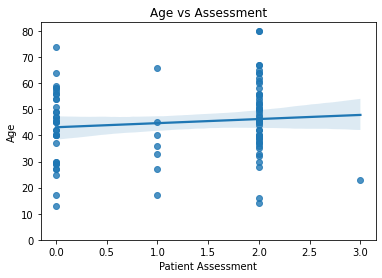

In [22]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y =LabelEncoder()
X = labelencoder_y.fit_transform(dataset["assessment"])
print("Sample X:",X[:1])
print("0 :",labelencoder_y.classes_[0])
print("1 :",labelencoder_y.classes_[1])
print("2 :",labelencoder_y.classes_[2])
print("3 :",labelencoder_y.classes_[3])

sns.regplot(x=X, y="Age", data=dataset)
plt.title('Age vs Assessment')
plt.xlabel('Patient Assessment')
plt.ylabel('Age')
plt.ylim(0,)

In [23]:
dataset['assessment'].value_counts()

Patient is Having Severe Uncertainties in Test Results, Get Admitted Immediately     52
Patient Needs to Consult a Doctor Soon                                               35
Patient can Consult a Doctor (Note: Not Urgent)                                       7
Patient is Totally Fine, No Need to Consult a Doctor                                  1
Name: assessment, dtype: int64

In [24]:
dataset['assessment'].value_counts().idxmax()

'Patient is Having Severe Uncertainties in Test Results, Get Admitted Immediately '

10


([<matplotlib.axis.XTick at 0x7feaed642d60>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

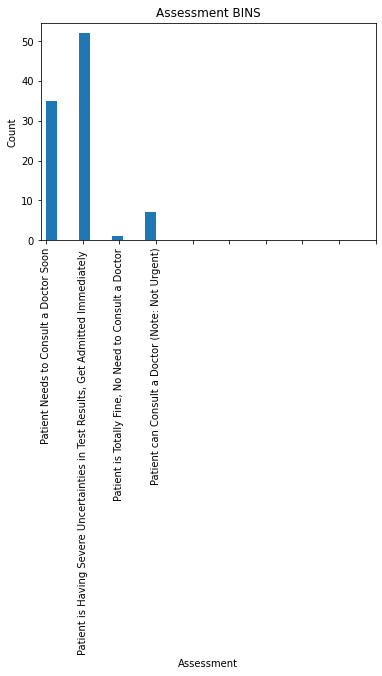

In [25]:
dataset['assessment'] = dataset['assessment'].astype(str,copy=True)

%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(dataset['assessment'])

plt.xlabel("Assessment")
plt.ylabel("Count")
duration = ('Hypothyroidism','Graves Disease','Colloid Goitre','Solitary nodule thyroid')
plt.title("Assessment BINS")
print(len('assessment'))
index = np.arange(len('assessment'))
plt.xticks(index,rotation = 90)

# $\color{red}{\text{Model Development and Evaluation}}$

## Gradient Boosting Classifier

Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting.

The Python machine learning library, Scikit-Learn, supports different implementations of gradient boosting classifiers, including XGBoost.

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [27]:
normDS.columns

Index(['Name', 'Age', 'Sex', 'Systolic Pressure', 'Diastolic Pressure',
       'Hb-Hemoglobin', 'Hct-Hematocrit', 'WBC', 'Plateletes', 'F-fasting',
       'PP-postprandial', 'Urea', 'Creatinine', 'Na-Sodium', 'K-Potassium',
       'Ca-Calcium', 'Total Proteins', 'A-Albumin', 'G-Globulins',
       'Total Biliburin', 'Direct Biliburin', 'Indirect Biliburin', 'SGOT',
       'ALKP04ASE'],
      dtype='object')

In [28]:
# X=dataset.iloc[:,[4,5,6]].values
X=normDS.iloc[:,[1,3,4,5,6,7,8,12,16,22]].values
Y=dataset.iloc[:,25].values
X[1:5]

array([[ 4.20000000e+01, -5.71393871e-01, -1.50061027e+00,
        -3.92184117e-01,  3.02682817e+00,  4.15198246e+00,
        -8.30553443e-02,  2.62435303e-01, -8.12145837e-02,
         5.23645192e-01],
       [ 4.00000000e+01, -6.20922727e-01, -1.01869104e+00,
        -9.28704372e-02,  0.00000000e+00, -8.11653296e-01,
        -8.93340296e-02, -5.04616978e-01, -8.12145837e-02,
        -5.96268287e-01],
       [ 1.30000000e+01,  0.00000000e+00,  0.00000000e+00,
         1.36016494e-01, -3.66173959e-01, -8.11906656e-01,
        -9.89264654e-02, -2.12899776e-16,  0.00000000e+00,
        -3.18298555e-16],
       [ 1.70000000e+01, -6.20922727e-01,  4.27066630e-01,
         2.76869991e-01, -3.19232815e-01,  6.27301011e-01,
        -1.36806122e-01, -1.40267144e-01,  3.66729667e-01,
        -4.17082130e-01]])

### Label Encoder

not in use ... without it getting better accuracy

In [29]:
# from sklearn.preprocessing import LabelEncoder
# labelencoder_y =LabelEncoder()
# Y = labelencoder_y.fit_transform(Y)
# print("Sample y:",Y[:1])
# print("0 :",labelencoder_y.classes_[0])
# print("1 :",labelencoder_y.classes_[1])
# print("2 :",labelencoder_y.classes_[2])
# print("3 :",labelencoder_y.classes_[3])

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)      # 80% training set and 20% test set

## Model training and evaluation

In [31]:
# creating graidentboosting Classifier object
gradientclassifier =GradientBoostingClassifier(max_depth=2,n_estimators=3,learning_rate=1.0)

# Train gradient boost regressor
model =gradientclassifier.fit(X_train,Y_train)

# Predict the response for the dataset
Y_pred=model.predict(X_test)

model.score(X_test,Y_test)

0.631578947368421

### important Parameters
* n_estimators: number of weak learners to train iteratively
* learning_rate: it contributes to the weight of weak learners.it uses 1 as default

In [32]:
Y_pred.shape

(19,)

In [33]:
Y_test.shape

(19,)

not working ...printing out accuracy

In [34]:
# r2_score(Y_pred,X_test)

# from sklearn.metrics import accuracy_score
# score = accuracy_score(Y_test,Y_pred)
# score

# from sklearn.metrics import classification_report
# matrix = classification_report(Y_test,Y_pred)
# print('Classification report: \n', matrix)


### Lets hypertune the parameters

In [35]:
from sklearn.model_selection import GridSearchCV

LR= {'learning_rate':[0.15,0.1,0.10,0.05],'n_estimators':[100,150,200,250]}

tuning=GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=LR,scoring='r2')
tuning.fit(X_train,Y_train)
tuning.best_params_,tuning.best_score_

/Users/MufaddalRAgib/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/MufaddalRAgib/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/MufaddalRAgib/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/MufaddalRAgib/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/MufaddalRAgib/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py", line 774, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/Users/MufaddalRAgib/opt/

({'learning_rate': 0.15, 'n_estimators': 100}, nan)

similarly other hyperparameters like max_depth, split criteria,no of leaf nodes etc can be tuned

pros:
* gives better accuracy in most of the cases
* it iteratively corrects the mistakes of the weak classifers and improves accuracy by combining weak learners

cons:
* space and time complexity
* hpyerparameter tuning

## DECISION TREE

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=0)
classifier = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=6,splitter='best', random_state=1)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing

In [37]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[10  1  2  0]
 [ 0  1  1  0]
 [ 1  0 16  0]
 [ 1  0  0  0]]


In [38]:
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test,Y_pred)
score

0.8181818181818182

In [39]:
from sklearn.metrics import classification_report
matrix = classification_report(Y_test,Y_pred)
print('Classification report: \n', matrix)

Classification report: 
                                                                                    precision    recall  f1-score   support

                                           Patient Needs to Consult a Doctor Soon       0.83      0.77      0.80        13
                                  Patient can Consult a Doctor (Note: Not Urgent)       0.50      0.50      0.50         2
Patient is Having Severe Uncertainties in Test Results, Get Admitted Immediately        0.84      0.94      0.89        17
                             Patient is Totally Fine, No Need to Consult a Doctor       0.00      0.00      0.00         1

                                                                         accuracy                           0.82        33
                                                                        macro avg       0.54      0.55      0.55        33
                                                                     weighted avg       0.79      0.82      0.80

/Users/MufaddalRAgib/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/MufaddalRAgib/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/MufaddalRAgib/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

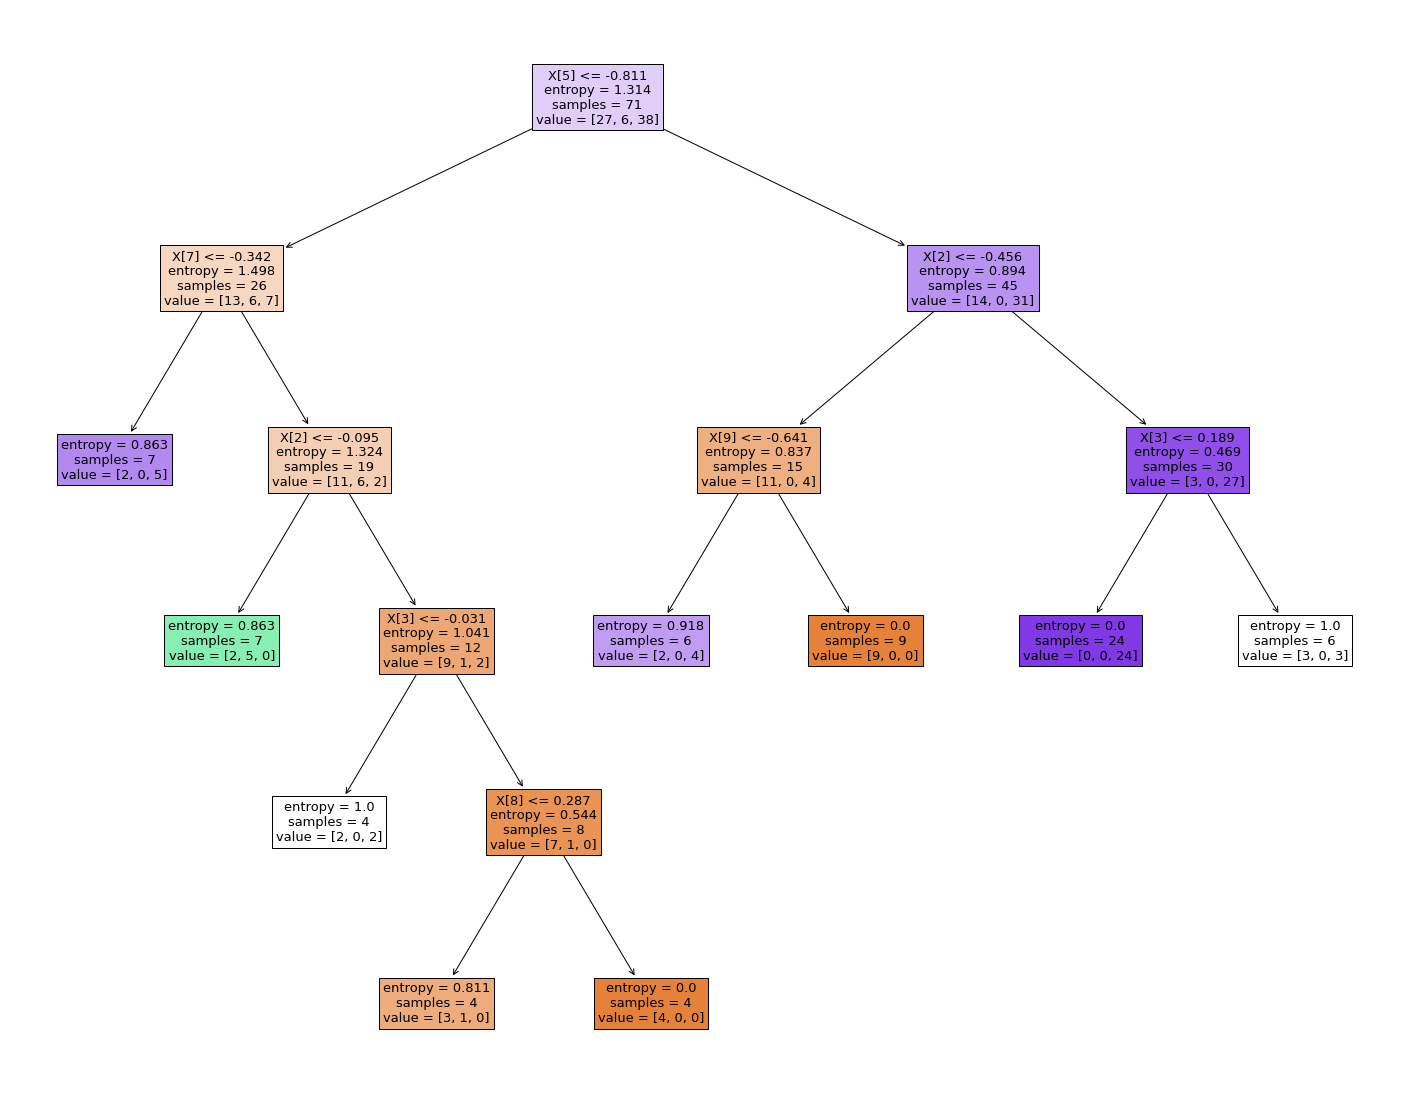

In [40]:
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import export_graphviz
X=normDS.iloc[:,[1,3,4,5,6,7,8,12,16,22]].values
Y=dataset.iloc[:,25].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
classifier = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=4, random_state=0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

fig = plt.figure(figsize=(25,20))
tree.plot_tree(classifier,fontsize=13,filled=True)
plt.show()

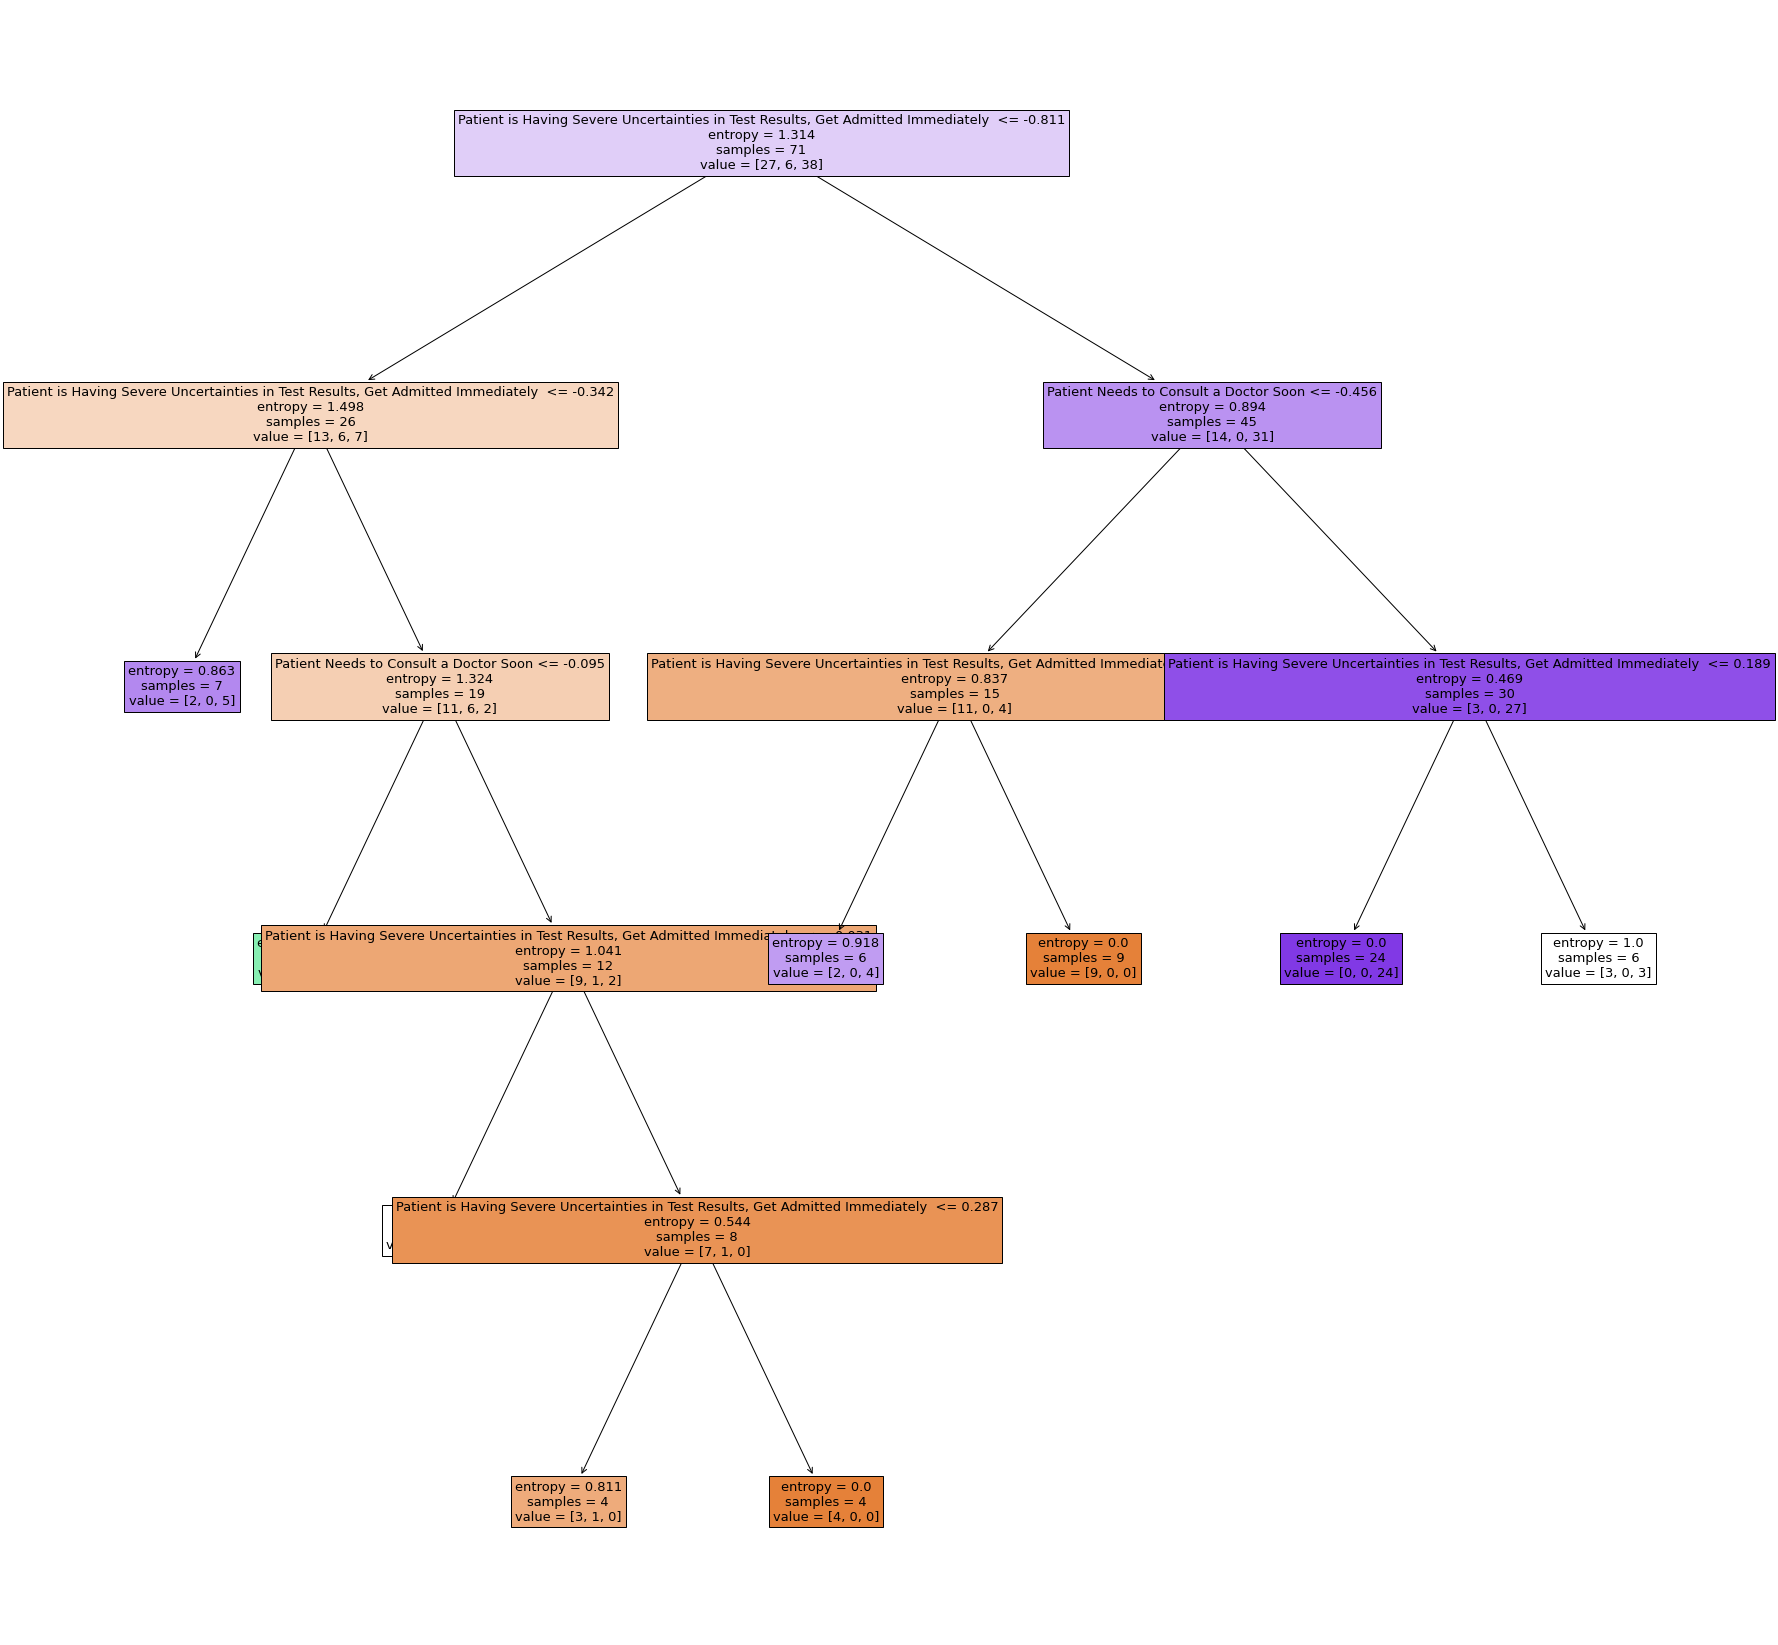

In [41]:
fig = plt.figure(figsize=(30,30))
tree.plot_tree(classifier, feature_names=Y_pred,fontsize=13,filled=True)
plt.show()

## Logistic Regression

Logistic regression is a process of modeling the probability of a discrete outcome given an input variable. Logistic regression is a useful analysis method for classification problems, where you are trying to determine if a new sample fits best into a category.

In [42]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression


In [43]:
X=normDS.iloc[:,[1,3,4,5,6,7,8,12,16,22]].values
Y=dataset.iloc[:,25].values

In [44]:
labelencoder_y =LabelEncoder()
Y = labelencoder_y.fit_transform(Y)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)


In [46]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)


/Users/MufaddalRAgib/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
y_pred = logistic_regression.predict(X_test)

logistic_regression.score(X_test,y_test)

0.8333333333333334

In [48]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_pred)
print('Classification report: \n', matrix)

Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       1.00      0.33      0.50         3
           2       0.85      0.92      0.88        12

    accuracy                           0.83        24
   macro avg       0.88      0.71      0.74        24
weighted avg       0.85      0.83      0.82        24



## Linear Regression

Linear regression is a linear model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). ... Different techniques can be used to prepare or train the linear regression equation from data, the most common of which is called Ordinary Least Squares

In [49]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression


X=normDS.iloc[:,[1,3,4,5,6,7,8,12,16,22]].values
Y=dataset.iloc[:,25].values


In [50]:
labelencoder_y =LabelEncoder()
Y = labelencoder_y.fit_transform(Y)

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)      # 80% training set and 20% test set

In [52]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train, Y_train)  # perform linear regression

LinearRegression()

In [53]:
Y_pred = linear_regressor.predict(X_test)  # make predictions

linear_regressor.score(X_test,Y_test)

-0.09448237635493051

## Support Vector Machine

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. The advantages of support vector machines are: Effective in high dimensional spaces. Still effective in cases where number of dimensions is greater than the number of samples.

In [54]:
from sklearn import svm

X=normDS.iloc[:,[1,3,4,5,6,7,8,12,16,22]].values
Y=dataset.iloc[:,25].values


In [55]:
labelencoder_y =LabelEncoder()
Y = labelencoder_y.fit_transform(Y)


In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.21, random_state=0)      # 80% training set and 20% test set


In [57]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, Y_train)


SVC(kernel='linear')

In [58]:
Y_pred=clf.predict(X_test)

clf.score(X_test,Y_test)

0.8

*** 
> Gradient Boosting Classifier    0.7368421052631579              73% 
***  
> Gradient Boosting Regressor    -0.13399115788482474            -13.3%
*** 
> Decision tree                   0.6666666666666666              66%
*** 
> Logistic Regression             0.75                            75%
*** 
> Linear Regression               -0.09448237635493051            -9%
*** 
> Support vector Machine          0.5263157894736842              52%